In [1]:
import pandas as pd
import numpy as np

# Read the CSV file.
df = pd.read_csv("./S&P 500 2023 Data.csv")

# Categorize states based on the "Change %" column.
def categorize_change(change_percent_str):
    change_percent = float(change_percent_str.replace('%', ''))
    if change_percent > 1:
        return 1  # State 1: Going Up High
    elif 0 <= change_percent <= 1:
        return 2  # State 2: Going Up Low
    elif -1 <= change_percent < 0:
        return 3  # State 3: Going Down Low
    else:
        return 4  # State 4: Going Down High

# Convert "Change %" of each row to state.
df['state'] = df['Change %'].apply(categorize_change)

# Initialize the transition probability matrix.
transition_matrix = np.zeros((4, 4))

# Count state transitions.
for i in range(1, len(df)):
    from_state = df['state'][i - 1] - 1
    to_state = df['state'][i] - 1
    transition_matrix[from_state][to_state] += 1

# Convert to transition probability matrix.
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

print("Transition Matrix:")
print(transition_matrix)


Transition Matrix:
[[0.11111111 0.33333333 0.47222222 0.08333333]
 [0.16666667 0.39215686 0.3627451  0.07843137]
 [0.12048193 0.43373494 0.26506024 0.18072289]
 [0.17857143 0.5        0.25       0.07142857]]


In [118]:
transition_matrix

array([[0.11111111, 0.33333333, 0.47222222, 0.08333333],
       [0.16666667, 0.39215686, 0.3627451 , 0.07843137],
       [0.12048193, 0.43373494, 0.26506024, 0.18072289],
       [0.17857143, 0.5       , 0.25      , 0.07142857]])

In [136]:
state=np.array([[1.0,0.0,0.0,0.0]]) 
stateHist=state 
dfStateHist=pd.DataFrame(state) 
distr_hist = [[0,0,0,0]] 

for x in range(100): 
    state=np.dot(state,transition_matrix)
    stateHist=np.append(stateHist,state,axis=0) 
    dfDistrHist = pd.DataFrame(stateHist) 

            0         1         2         3
0    1.000000  0.000000  0.000000  0.000000
1    0.111111  0.333333  0.472222  0.083333
2    0.139676  0.414242  0.319385  0.126697
3    0.145664  0.410883  0.332553  0.110899
4    0.144536  0.409375  0.333703  0.112386
..        ...       ...       ...       ...
96   0.144578  0.409639  0.333333  0.112450
97   0.144578  0.409639  0.333333  0.112450
98   0.144578  0.409639  0.333333  0.112450
99   0.144578  0.409639  0.333333  0.112450
100  0.144578  0.409639  0.333333  0.112450

[101 rows x 4 columns]


<Axes: >

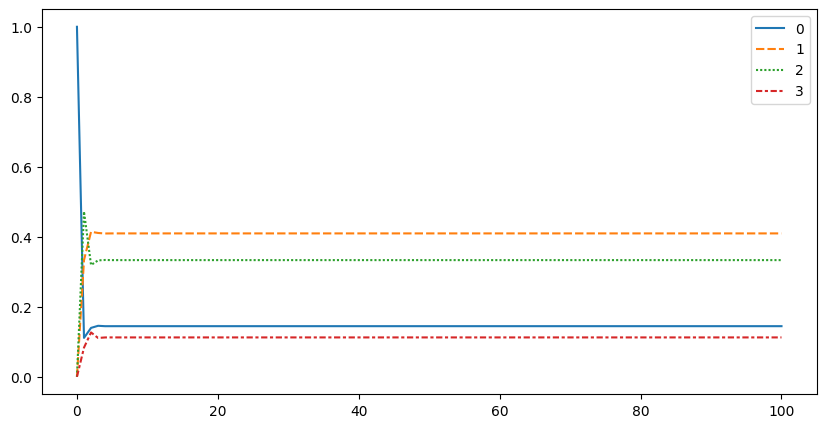

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Plotting graph
plt.figure(figsize=(10,5)) 
print(dfDistrHist) 
sns.lineplot(data=dfDistrHist)

In [18]:
np.argmax(state)

2

In [ ]:
next_predict_state=np.dot(state,transition_matrix)

In [119]:
def predict_state(inital_state, label):
    if inital_state == 0:
        inital_state=np.array([[1.0,0.0,0.0,0.0]])
    elif inital_state == 1:
        inital_state=np.array([[0.0,1.0,0.0,0.0]])
    elif inital_state == 2:
        inital_state=np.array([[0.0,0.0,1.0,0.0]])
    else:
        inital_state=np.array([[0.0,0.0,0.0,1.0]])
    next_predict_state=np.dot(inital_state,transition_matrix)
    next_state_index = np.argmax(next_predict_state)

    condition_index = df[df['Date'] == label].index
    condition_index_int = condition_index.tolist()
    previous_index = [i - 1 for i in condition_index_int]
    if previous_index[0] == -1:
        previous_index = 0
    else:
        previous_index = previous_index[0]
    if df['state'][int(previous_index)] == next_state_index:
        result = True
    else:
        result = False
    
    return next_state_index, next_predict_state, result

In [100]:
df['state'][0]

3

In [101]:
df_predict = pd.read_csv("/home/minwook0008/please/OR2/or2_case_study/markovChain/final_predict.csv")


In [102]:
df_predict['date'][i]

'12/29/2023'

In [121]:
right = 0
wrong = 0
final_result = {}
for i in range(len(df_predict['date'])):
    label=str(df_predict['date'][i])
    inital_state=df_predict['state'][i]
    next_state_index, next_predict_state, result=predict_state(inital_state, label)
    
    final_result[label] = {'inital_state': inital_state, 'next_predict_state': next_state_index, 'next_state_prob':next_predict_state, 'right':result}
    if result == True:
        right+= 1
    else:
        wrong += 1

In [124]:
right

39

In [125]:
wrong

211

In [123]:
final_result

{'12/29/2023': {'inital_state': 1,
  'next_predict_state': 1,
  'next_state_prob': array([[0.16666667, 0.39215686, 0.3627451 , 0.07843137]]),
  'right': False},
 '12/28/2023': {'inital_state': 3,
  'next_predict_state': 1,
  'next_state_prob': array([[0.17857143, 0.5       , 0.25      , 0.07142857]]),
  'right': False},
 '12/27/2023': {'inital_state': 3,
  'next_predict_state': 1,
  'next_state_prob': array([[0.17857143, 0.5       , 0.25      , 0.07142857]]),
  'right': False},
 '12/26/2023': {'inital_state': 2,
  'next_predict_state': 1,
  'next_state_prob': array([[0.12048193, 0.43373494, 0.26506024, 0.18072289]]),
  'right': False},
 '12/22/2023': {'inital_state': 1,
  'next_predict_state': 1,
  'next_state_prob': array([[0.16666667, 0.39215686, 0.3627451 , 0.07843137]]),
  'right': False},
 '12/21/2023': {'inital_state': 0,
  'next_predict_state': 2,
  'next_state_prob': array([[0.11111111, 0.33333333, 0.47222222, 0.08333333]]),
  'right': True},
 '12/20/2023': {'inital_state': 1,


In [129]:
import pickle
with open('final_result_predict.pkl', 'wb') as file:
    pickle.dump(final_result, file)

In [131]:
39/250

0.156